<a href="https://colab.research.google.com/github/Vardhanksai/DAUP-LAB-B37-/blob/main/2026_DAUP_PE1_LAB10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("/content/insurance.csv")  # Replace with the actual file name if different
df.head()  # Display the first few rows

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


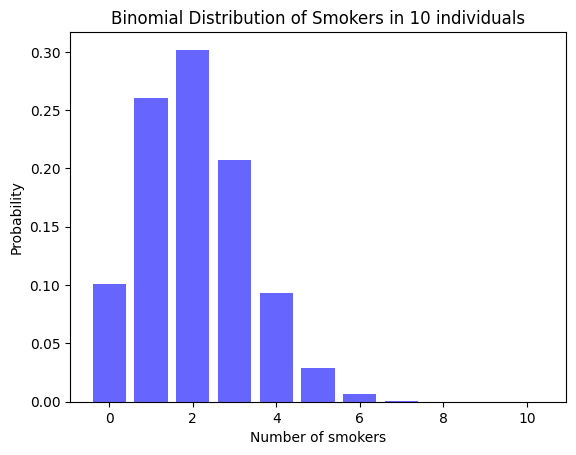

In [3]:
# Question 1: Binomial Probability in Insurance Claims
# (a) Probability that at least 4 out of 10 are smokers
p_smoker = (df['smoker'] == 'yes').mean()
n = 10
k = 4
# Using Binomial formula
binom_prob = sum(stats.binom.pmf(i, n, p_smoker) for i in range(k, n+1))
# Using survival function (equivalent to 1 - CDF at k-1)
pbinom_prob = 1 - stats.binom.cdf(k-1, n, p_smoker)
# (b) Plot Binomial Distribution
x = np.arange(0, n+1)
y = stats.binom.pmf(x, n, p_smoker)
plt.bar(x, y, color='blue', alpha=0.6)
plt.xlabel('Number of smokers')
plt.ylabel('Probability')
plt.title('Binomial Distribution of Smokers in 10 individuals')
plt.show()

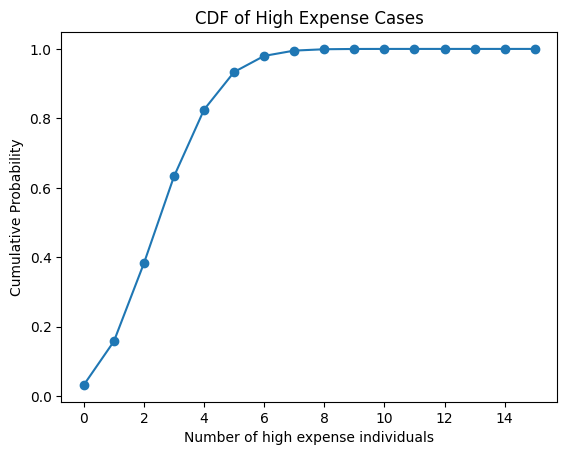

In [4]:
# Question 2: Risk Estimation Using Binomial Distribution

p_high_expense = (df['expenses'] > 20000).mean()
n2 = 15
k2 = 5

# (a) Probability that exactly 5 have expenses above $20,000
exact_prob = stats.binom.pmf(k2, n2, p_high_expense)

# (b) Cumulative probability that at most 5
cumulative_prob = stats.binom.cdf(k2, n2, p_high_expense)

# (c) Plot CDF
x2 = np.arange(0, n2+1)
y2 = stats.binom.cdf(x2, n2, p_high_expense)
plt.plot(x2, y2, marker='o', linestyle='-')
plt.xlabel('Number of high expense individuals')
plt.ylabel('Cumulative Probability')
plt.title('CDF of High Expense Cases')
plt.show()

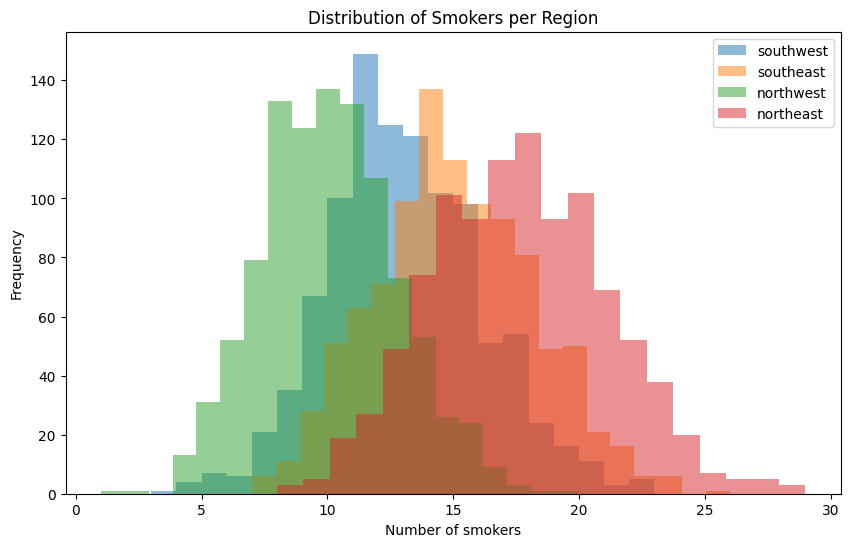

In [5]:
# Question 3: Estimating Regional Smoking Rates Using Binomial Approximation

regions = {'southwest': 0.25, 'southeast': 0.30, 'northwest': 0.20, 'northeast': 0.35}
n3 = 50
samples = {region: np.random.binomial(n3, p, 1000) for region, p in regions.items()}

# (b) Visualizing the distribution
plt.figure(figsize=(10,6))
for region, data in samples.items():
    plt.hist(data, bins=20, alpha=0.5, label=region)
plt.legend()
plt.xlabel('Number of smokers')
plt.ylabel('Frequency')
plt.title('Distribution of Smokers per Region')
plt.show()

# (c) Expected number of smokers per region
expected_values = {region: n3 * p for region, p in regions.items()}

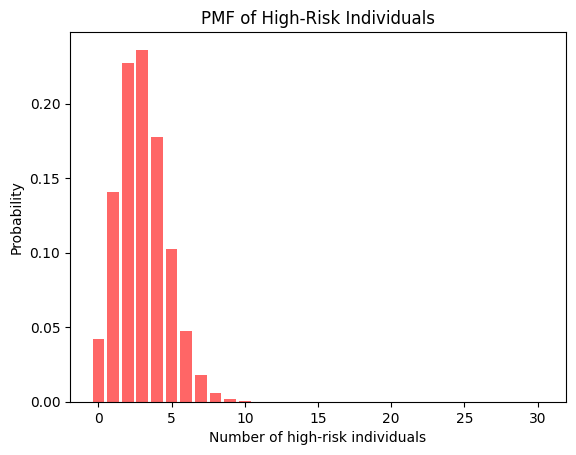

In [6]:
# Question 4: Inverse Probability & Quantile Function for Insurance Risks

# (a) Threshold charge for top 10% high-risk individuals
threshold_charge = np.percentile(df['expenses'], 90)

# (b) Probability of selecting 8 high-risk individuals in a sample of 30
p_high_risk = (df['expenses'] > threshold_charge).mean()
n4 = 30
k4 = 8
prob_high_risk_8 = stats.binom.pmf(k4, n4, p_high_risk)

# (c) PMF plot
x4 = np.arange(0, n4+1)
y4 = stats.binom.pmf(x4, n4, p_high_risk)
plt.bar(x4, y4, color='red', alpha=0.6)
plt.xlabel('Number of high-risk individuals')
plt.ylabel('Probability')
plt.title('PMF of High-Risk Individuals')
plt.show()

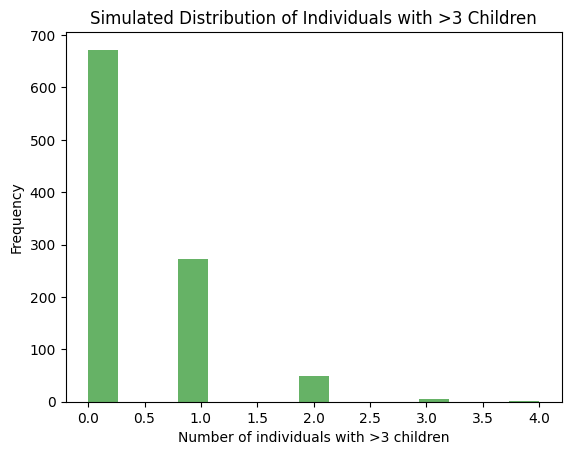

In [7]:
# Question 5: Modeling the Probability of Having More than 3 Children

p_more_than_3_children = (df['children'] > 3).mean()
n5 = 12
k5 = 5

# (a) Probability of at least 5 individuals having more than 3 children
prob_at_least_5 = 1 - stats.binom.cdf(k5-1, n5, p_more_than_3_children)

# (b) Simulation
simulated_children = np.random.binomial(n5, p_more_than_3_children, 1000)
plt.hist(simulated_children, bins=15, alpha=0.6, color='green')
plt.xlabel('Number of individuals with >3 children')
plt.ylabel('Frequency')
plt.title('Simulated Distribution of Individuals with >3 Children')
plt.show()

# (c) Compare mean and variance
simulated_mean = np.mean(simulated_children)
simulated_variance = np.var(simulated_children)
theoretical_mean = n5 * p_more_than_3_children
theoretical_variance = n5 * p_more_than_3_children * (1 - p_more_than_3_children)